<a href="https://colab.research.google.com/github/chelynl/Machine_Learning/blob/main/Polynomial_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Polynomial Regression**

<u>Characteristics</u>:
- linear on coefficients
- nonlinear function of input x
- appropriate when data is nonlinearly distributed

Feature scaling is not necessary since y is just a linear combination of the coefficients, which can put everything on the same scale.

Find the best degree ***visually*** by plotting the model and testing several degrees. You can also find ***lowest RMSE*** for your model but be careful not to overfit.



## Import data

In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/chelynl/ML_notes/main/regression/Position_Salaries.csv?token=AMGO4MBM5TRVWHUW44RPS7LAX7AYY')

In [4]:
df

,Position,Level,Salary
0,Business Analyst,1,45000
1,Junior Consultant,2,50000
2,Senior Consultant,3,60000
3,Manager,4,80000
4,Country Manager,5,110000
5,Region Manager,6,150000
6,Partner,7,200000
7,Senior Partner,8,300000
8,C-level,9,500000
9,CEO,10,1000000


In [9]:
# Define inputs and target
X = df.iloc[:, 1:-1].values # Position col is already encoded as Level col
y = df.iloc[:, -1].values

## Train linear regression model

In [10]:
# Fit linear regression for comparison
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

## Train polynomial regression model

In [19]:
from sklearn.preprocessing import PolynomialFeatures

# Instantiate polynomial features obj
# trial-and-error to find best degree
poly_reg = PolynomialFeatures(degree = 4)

# Get new matrix of transformed features of levels at different powers
X_poly = poly_reg.fit_transform(X)

# Build a linear regression model with the new matrix of features
lin_reg_2 = LinearRegression()
lin_reg_2.fit(X_poly, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

## Visualize linear regression model

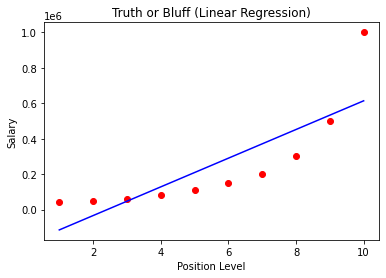

In [14]:
plt.scatter(X, y, color = 'red')
plt.plot(X, lin_reg.predict(X), color = 'blue')
plt.title('Truth or Bluff (Linear Regression)')
plt.xlabel('Position Level')
plt.ylabel('Salary')
plt.show()

## Visualize polynomial regression model

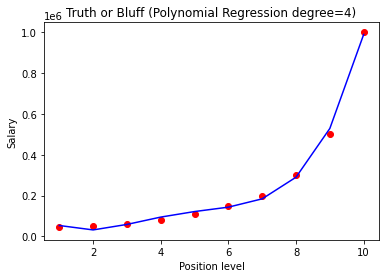

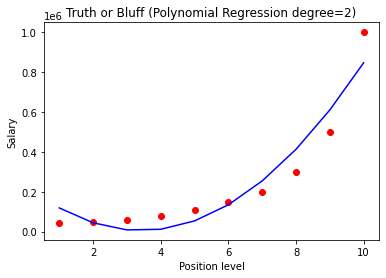

In [21]:
# degrees=4
plt.scatter(X, y, color = 'red')
plt.plot(X, lin_reg_2.predict(poly_reg.fit_transform(X)), color = 'blue')
plt.title('Truth or Bluff (Polynomial Regression degree=4)')
plt.xlabel('Position level')
plt.ylabel('Salary')
plt.show()

# degree=2
poly_reg2 = PolynomialFeatures(degree = 2)
X_poly2 = poly_reg2.fit_transform(X)
lin_reg_3 = LinearRegression()
lin_reg_3.fit(X_poly2, y)

plt.scatter(X, y, color = 'red')
plt.plot(X, lin_reg_3.predict(poly_reg2.fit_transform(X)), color = 'blue')
plt.title('Truth or Bluff (Polynomial Regression degree=2)')
plt.xlabel('Position level')
plt.ylabel('Salary')
plt.show()

# degree=4 is obviously the better fit!

## Predict new result with linear regression

In [23]:
# Predict salary for someone with 6.5 level
# input needs to be an array: [[input]]
lin_reg.predict([[6.5]])

# Prediction is way higher than actual

array([330378.78787879])

## Predict new result with polynomial regression

In [24]:
# Predict salary for someone with 6.5 level
# input needs to be an array and transformed
lin_reg_2.predict(poly_reg.fit_transform([[6.5]]))

array([158862.45265155])